# GROUP: Rachana Choudhary(18510063), Nitish goyal(18510053)

# PH509 Lab 2A

## Implementation of Euler and Euler-Cromer ODE. 

### a
Write a function for solving the Newton's laws of motion $$\frac{d^2 x}{dt^2} = a(x, \dot{x}, t),$$ using Euler and Euler-Cromer algorithms. As shown in class, this 2nd order ODE can be broken into a set of 2 coupled 1st order ODEs:

$$ \frac{d}{dt} \begin{pmatrix}x \\ v \end{pmatrix} = \begin{pmatrix} {v} \\ a(x,v,t) \end{pmatrix}$$

The $\texttt{EulerODE}(\, )$ function should take following as input:

a. a list or array containing initial condition for $x$ and $v$ i.e. $[x_0, v_0]$.

b. a list or array with starting time and end time i.e. $[t_0, t_{max}]$.

c. The function to calculate the right-hand side of the above equation. It can be defined with a Python function as follows:

$$\texttt{rhs} \; \Big(x_{k}, v_{k}, t_{k} \Big):$$ 

and return a list containing the velocity and acceleration at time $t_k$:

$$ \texttt{return} \qquad \Big[ v[t_k], \, a[t_k] \Big]$$

Hence the functional form for the $\texttt{EulerODE}$ should be as follows: 

$$\texttt{EulerODE} \Big([x_0, v_0], \; [t_0, t_{max}], \; rhs\Big)$$

Make a similar function for Euler-Cromer algorithm $\texttt{EulerCromerODE}(\, )$. 

### b

Use these functions to solve for the simple harmonic pendulum:
$$\frac{d^2 \theta}{dt^2} =  − k \, sin \theta,$$
with boundary conditions:
at $t = 0$, $\theta = \pi/4, \dot{\theta} = 0$. Note that the initial amplitude is quite large, so it is not really a simple harmonic oscillator.

Plot $\theta$ Vs $t$ and the phase space trajectory. 

Explore the system for small oscillations and explain any qualitative difference from the previous case. (For this choose suitable boundary conditions).

### c
Plot the total energy as a function of time for both the methods. Notice any oscillations?




In [1]:

import numpy as np
import matplotlib.pyplot as plt


In [2]:
def rhs(xk, vk, t):
    ak = -xk
    return(vk, ak)

In [3]:
def solve_E(in_con, time, rhs):                     #Solution by euler method(explicit)
    t = np.linspace(time[0], time[1], 1000)
    dt=t[1]-t[0]
    tau=1
    x=[in_con[0]]
    v=[in_con[1]]
    for i in range(999):
        vk,ak = rhs(x[i], v[i], t[i])
        x.append(0)
        x[i+1] = x[i] + vk * dt
        v.append(0)    
        v[i+1] = v[i] + ak * dt
    return(x,v,t)
x,v,t = solve_E([0.5,0], [0,50], rhs)

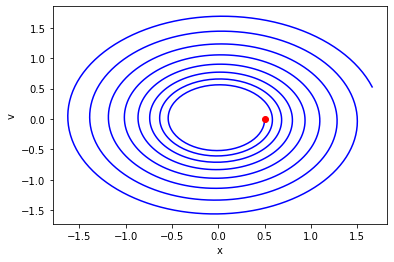

In [4]:
plt.figure(1)
plt.plot(x,v,'b')
plt.xlabel('x')
plt.ylabel('v')
plt.plot(0.5,0,'ro')
plt.show()



Text(0, 0.5, 'x')

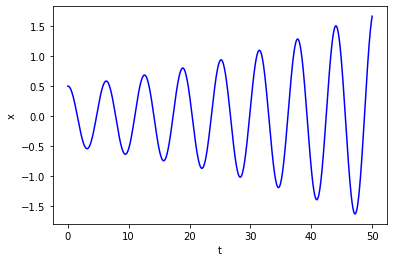

In [5]:
plt.figure(2)
plt.plot(t,x,'b')
plt.xlabel('t')
plt.ylabel('x')


In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
def rhs(xk, vk, t):
    ak = -xk
    return(vk, ak)

In [8]:
def solve_Ek(in_con, time, rhs):                     #Solution by Euler-Krommer method(implicit)
    t = np.linspace(time[0], time[1], 1000)
    dt=t[1]-t[0]
    tau=1
    x=[in_con[0]]
    v=[in_con[1]]
    for i in range(999):
        vk,ak = rhs(x[i], v[i], t[i])
        v.append(0)    
        v[i+1] = v[i] + ak * dt
        x.append(0)
        x[i+1] = x[i] + v[i+1] * dt
    return(x, v, t)
x,v,t = solve_Ek([0.5,0], [0,50], rhs)

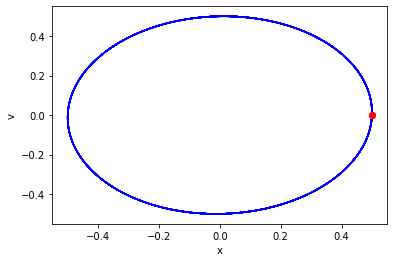

In [9]:
plt.figure(1)
plt.plot(x,v,'b')
plt.plot(.5,0,'ro')
plt.xlabel('x')
plt.ylabel('v')
plt.plot(0.5,0,'ro')
plt.show()

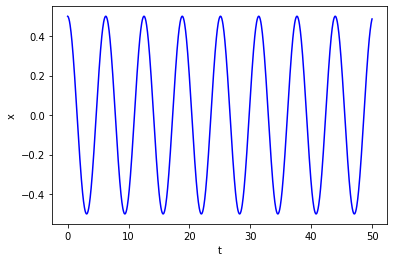

In [10]:
plt.figure(2)
plt.plot(t,x,'b')
plt.xlabel('t')
plt.ylabel('x')
plt.show()

In [11]:
# b part

In [12]:

# here theta is denoted as x and omega is denoted as v and alpha is denoted as a
def rhs(xk, vk, t):  
    ak = -np.sin(xk)
    return vk,ak

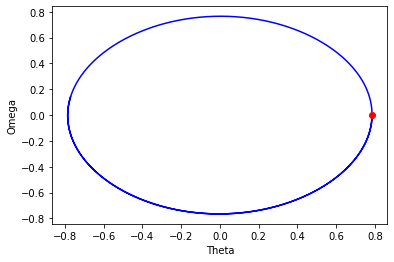

In [13]:
x,v,t = solve_Ek([np.pi/4,0], [0,10], rhs)
plt.figure(1)
plt.plot(x,v,'b')
plt.plot(np.pi/4,0,'ro')
plt.xlabel('Theta')
plt.ylabel('Omega')
plt.show()


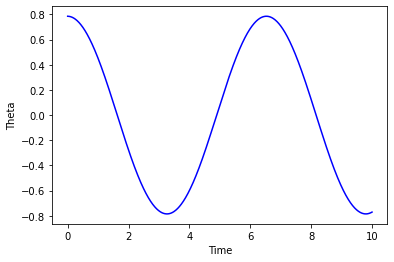

In [14]:
plt.figure(2)
plt.plot(t,x,'b')
plt.xlabel('Time')
plt.ylabel('Theta')
plt.show()

In [15]:
# clearly in above phase space trajectory, closed figure is a bit tilted which is not a perfect circle

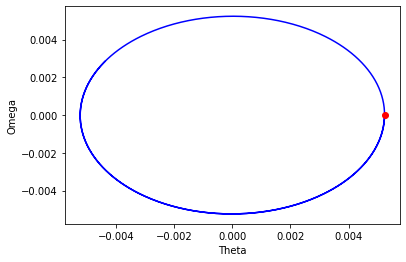

In [22]:
# For small oscillations
x,v,t = solve_Ek([np.pi/400,0], [0,10], rhs)
plt.figure(1)
plt.plot(x,v,'b')
plt.plot(np.pi/400,0,'ro')
plt.xlabel('Theta')
plt.ylabel('Omega')
plt.show()



### CLEARLY decreasing the angle makes phase trajectory more circular


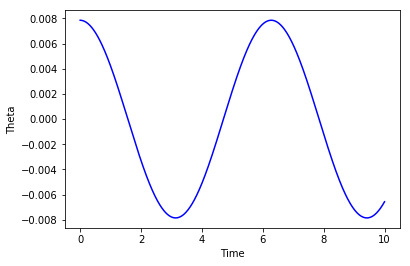

In [152]:
plt.figure(2)
plt.plot(t,x,'b')
plt.xlabel('Time')
plt.ylabel('Theta')
plt.show()

In [23]:
x,v,t = solve_Ek([np.pi/4,0], [0,10], rhs)  #Total energy graph for euler-kromer method

In [24]:
# Total energy as a function of time 
x=np.array(x)
v=np.array(v)
total_e=.5*v**2 +.5*x**2

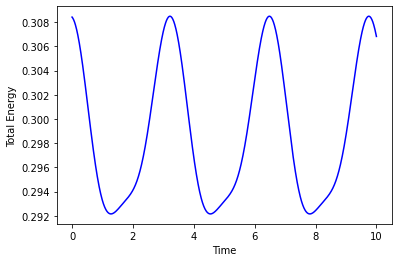

In [25]:
plt.figure(1)
plt.plot(t,total_e,'b')
plt.xlabel('Time')
plt.ylabel('Total Energy')
plt.show()

In [26]:
# The above total energy graph is for small oscillations for E-k method

In [27]:
x,v,t = solve_E([np.pi/4,0], [0,10], rhs)  #total energy graph is for Euler method

In [28]:
x=np.array(x)
v=np.array(v)
total_e=.5*v**2 +.5*x**2

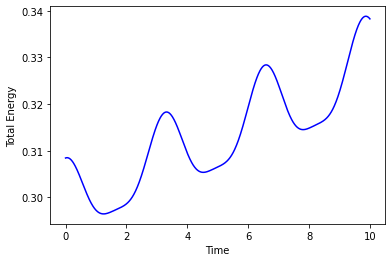

In [29]:
plt.figure(1)
plt.plot(t,total_e,'b')
plt.xlabel('Time')
plt.ylabel('Total Energy')
plt.show()

In [ ]:
# The above total energy graph is for Euler method



## Exploring Liouville's theorem with symplectic integrators

### Prob: A

The Euler and Euler-Cromer algorithms define a map from the $n^{th} \rightarrow (n+1)^{th}$ time steps. For a Simple Harmonic Oscillator (SHO), calculate the Jacobian of the transformation.
For this, explain why Euler algorithm is not suitable for solving the Newton's equations of motion? 

### Prob: B

For a SHO, consider a small square element of phase-space volume at $t = 0$ whose corners are labeled A, B, C and D respectively. In this exercise, we would like to follow the area enclosed as the system evolves in time. 

One way to do this is to evolve the four different initial conditions in time and plot the resultant polygon in the phase-space after regular intervals of time. For a conserved sytem, we expect this volume conserved in time. For a symplectic solver (like Euler-Cromer with a global accuracy of $\mathcal{O} (\Delta t)$), this is true. However this is not for the Euler algorithm.

__Alternately__,  consider the trajectory of a cloud of points through phase space. Show that as the cloud stretches in one coordinate – $p$ say – it shrinks in the corresponding ${q}$  direction so that the product ${ \Delta p\,\Delta q} $  remains constant.



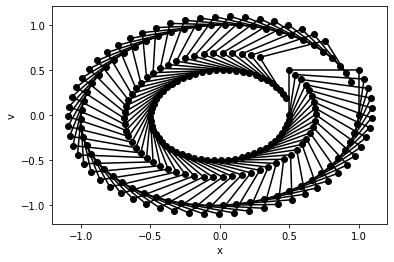

In [32]:

plt.figure(1)
x1,v1,a1,t=solve_Ek(0.5,0,0,15,1)
x2,v2,a1,t=solve_Ek(0.5,0.5,0,15,1)
x3,v3,a1,t=solve_Ek(1,0.5,0,15,1)
x4,v4,a1,t=solve_Ek(1,0,0,15,1)
l1=[]
l2=[]
A=[]

for i in range(0,60):

    l1.append((x1[i],x2[i],x3[i],x4[i]))
    l2.append((v1[i],v2[i],v3[i],v4[i]))
    plt.plot(l1[i],l2[i],'ko-')
    area=abs(.5*(x1[i]*(v2[i]-v3[i])+x2[i]*(v3[i]-v1[i])+x3[i]*(v1[i]-v2[i]))+.5*(x3[i]*(v4[i]-v1[i])+x4[i]*(v1[i]-v3[i])+x1[i]*(v3[i]-v4[i])))
    A.append(area)
plt.xlabel('x')
plt.ylabel('v')
plt.show()





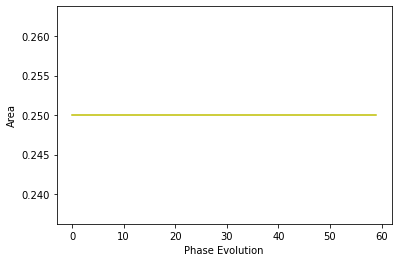

In [33]:
plt.plot(A,'y')

plt.xlabel('Phase Evolution')
plt.ylabel('Area')
plt.show()


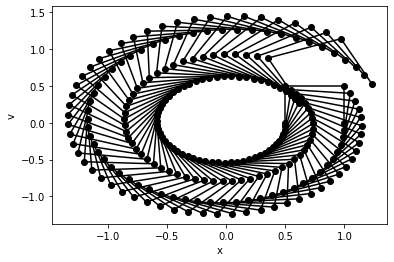

In [34]:
plt.figure(1)
x1,v1,a1,t=solve_E(0.5,0,0,15,1)
x2,v2,a1,t=solve_E(0.5,0.5,0,15,1)
x3,v3,a1,t=solve_E(1,0.5,0,15,1)
x4,v4,a1,t=solve_E(1,0,0,15,1)
l1=[]
l2=[]
A=[]


for i in range(0,60):

    
    l1.append((x1[i],x2[i],x3[i],x4[i]))
    l2.append((v1[i],v2[i],v3[i],v4[i]))
    plt.plot(l1[i],l2[i],'ko-')
    area=abs(.5*(x1[i]*(v2[i]-v3[i])+x2[i]*(v3[i]-v1[i])+x3[i]*(v1[i]-v2[i]))+.5*(x3[i]*(v4[i]-v1[i])+x4[i]*(v1[i]-v3[i])+x1[i]*(v3[i]-v4[i])))
    A.append(area)
plt.xlabel('x')
plt.ylabel('v')
plt.show()






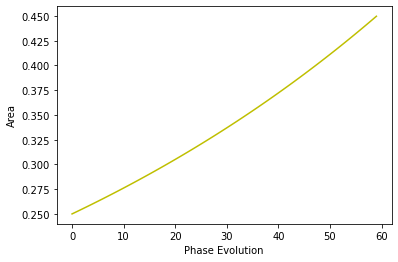

In [35]:
plt.plot(A,'y')

plt.xlabel('Phase Evolution')
plt.ylabel('Area')
plt.show()

### Clearly Phase space area is increasing in case of Euler method unlike euler crommer method



# Prob A Finding Jacobian



The jacobian of the above transformation is given as:
$$
J=\begin{vmatrix}
1-k(\delta t)^2 & \delta t\\
-k\delta t & 1\\
\end{vmatrix}
$$


In [36]:
g=10
l=5
tau=np.sqrt(g/l)
dt=tau/100


a=1-(l/g)*(dt**2)
b=dt
c=-(l/g)*dt
d=1




In [39]:
J= a*d-b*c # clearly Jacobian is given as this analytically

print('J = '+str(J))


J = 1.0



## Linearly-damped harmonic oscillator

In the real world, all classical harmonic oscillators have some form of damping that converts their mechanical energy into heat and eventually brings the system to rest. The simplest way to represent such an effect is to add a linear term $−by$ to the simple harmonic oscillator corresponding to a frictional force that is proportional to the velocity, 
\begin{eqnarray}
\dot{x} &=& v, \\
\dot{v} &=& -x.
\end{eqnarray}

The resulting system is called a damped harmonic oscillator, and b (if positive) is the damping constant. It describes the exponential rate at which orbits spiral into the origin of the phase-space at $(0,0)$ and is related to the $Q$ (quality factor) of the oscillator by $b = 1/Q$. The $Q$ of an oscillator is the number of radians of oscillation required for the energy to decay to $1/e$ of its original value. A system with $Q = 1/2$ (or $b = 2$) is critically damped, and smaller values of $Q$ (or $b > 2$) do not oscillate, but they rapidly approach the origin.

It seems that it should be possible to eliminate the $b$ in above by a linear rescaling of $x$, $v$, and $t$, but that cannot be done as simple algebra shows. 

This system is special in that it has _two distinct time-scales_, the damping rate and the frequency of oscillation, and the parameter $b$ controls their ratio.

Write a code to plot $x(t)$, $v(t)$ and phase-space trajectories for different values of the quality factor (demonstrating underdamped, critically damped and overdamped behaviour of this oscillator). Use both the Euler and Euler-Cromer algorithms. Write down an expression for the determinant of the Jacobian $J$ that maps $(x_n, v_n) \rightarrow (x_{n+1}, v_{n+1})$ in both the cases.

The damped harmonic oscillator is an example of a _dissipative system_. For $b>0$ is it time-reversible? Explain your answer.







In [41]:
def solve_Ek1(x0,v0,t0,T,tau,b):
    dt=tau/10
    
    
    v=[v0]
    x=[x0]
    
    a=[]
    t=np.linspace(0,T,int(T/dt)+1)
    for i in range(int(T/dt)):
        a.append(0)
        a[i]=-x[i]-b*v[i]
        v.append(0)
        
        v[i+1]=v[i]+a[i]*dt
        x.append(0)
        x[i+1]=x[i]+v[i+1]*dt
    return [x,v,a,t]

In [42]:
def solve_E1(x0,v0,t0,T,tau,b):
    dt=tau/10
    
    
    v=[v0]
    x=[x0]
    
    a=[]
    t=np.linspace(0,T,int(T/dt)+1)
    for i in range(int(T/dt)):
        a.append(0)
        a[i]=-x[i]-b*v[i]
        v.append(0)
        
        v[i+1]=v[i]+a[i]*dt
        x.append(0)
        x[i+1]=x[i]+v[i+1]*dt
    return [x,v,a,t]

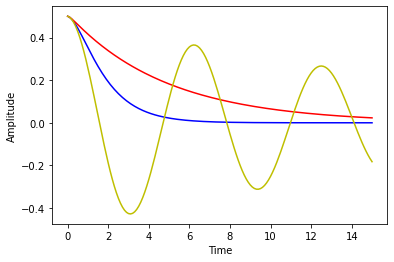

In [43]:
# Critically damped is blue
# Overdamped is red
# Underdamped is yellow


# Damping behaviour by E-K method

plt.figure(1)
x1,v1,a1,t=solve_Ek1(0.5,0,0,15,1,2)
plt.plot(t,x1,'b')
x1,v1,a1,t=solve_Ek1(0.5,0,0,15,1,5)
plt.plot(t,x1,'r')
x1,v1,a1,t=solve_Ek1(0.5,0,0,15,1,0.1)
plt.plot(t,x1,'y')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()














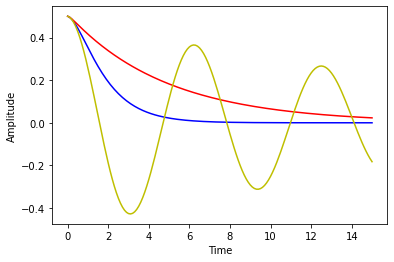

In [44]:
# Damping behaviour by Euler method

plt.figure(1)
x1,v1,a1,t=solve_E1(0.5,0,0,15,1,2)
plt.plot(t,x1,'b')
x1,v1,a1,t=solve_E1(0.5,0,0,15,1,5)
plt.plot(t,x1,'r')
x1,v1,a1,t=solve_E1(0.5,0,0,15,1,0.1)
plt.plot(t,x1,'y')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()



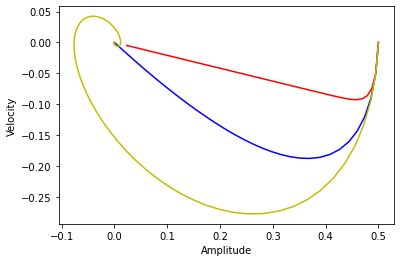

In [45]:
# Phase space trajectories by E-K method

plt.figure(1)
x1,v1,a1,t=solve_Ek1(0.5,0,0,15,1,2)
plt.plot(x1,v1,'b')
x1,v1,a1,t=solve_Ek1(0.5,0,0,15,1,5)
plt.plot(x1,v1,'r')
x1,v1,a1,t=solve_Ek1(0.5,0,0,15,1,1)
plt.plot(x1,v1,'y')
plt.ylabel('Velocity')
plt.xlabel('Amplitude')
plt.show()


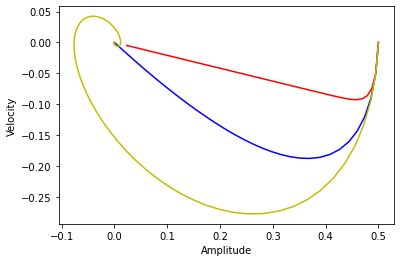

In [46]:
# Phase space trajectories by Euler method

plt.figure(1)
x1,v1,a,t=solve_E1(0.5,0,0,15,1,2)
plt.plot(x1,v1,'b')
x1,v1,a1,t=solve_E1(0.5,0,0,15,1,5)
plt.plot(x1,v1,'r')
x1,v1,a1,t=solve_E1(0.5,0,0,15,1,1)
plt.plot(x1,v1,'y')
plt.ylabel('Velocity')
plt.xlabel('Amplitude')
plt.show()

In [47]:

#Time reversal visualisation

def solve(x0,v0,t0,T,tau,b):
    dt=tau/10
    
    
    v=[v0]
    x=[x0]
    
    a=[]
    t=np.linspace(T,0,int(T/dt)+1)
    
    for i in range(int(T/dt)):
        a.append(0)
        a[i]=-x[i]-b*v[i]
        v.append(0)
        
        v[i+1]=v[i]+a[i]*dt
        x.append(0)
        x[i+1]=x[i]+v[i+1]*dt
    return [x,v,a,t]

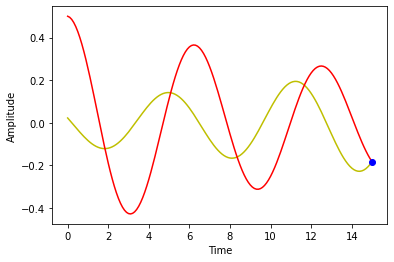

In [49]:
plt.figure(1)
x1,v1,a1,t=solve_Ek1(0.5,0,0,15,1,.1)
x2,v2,a2,t1=solve(x1[::-1][0],v1[::-1][0],0,15,1,.1)
plt.plot(t1,x2,'y')
plt.plot(t,x1,'r')
plt.plot(t1[0],x1[::-1][0],'bo')
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.show()



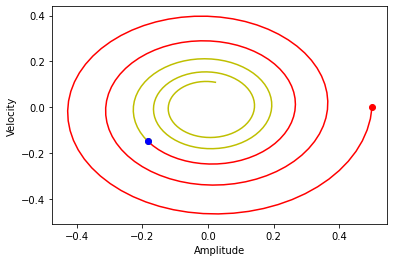

In [50]:
# The above time reversal is from time t=15

plt.figure(1)
x1,v1,a1,t=solve_Ek1(0.5,0,0,15,1,.1)
x2,v2,a2,t1=solve(x1[::-1][0],v1[::-1][0],0,15,1,.1)
plt.plot(x2,v2,'y')
plt.plot(x2[0],v2[0],'yo')
plt.plot(x1,v1,'r')
plt.plot(x1[0],v1[0],'ro')
plt.plot(x1[::-1][0],v1[::-1][0],'bo')
plt.ylabel('Velocity')
plt.xlabel('Amplitude')
plt.show()

# Phase trajectory continues its spiral even after time reversal
'''This is because upon changing the direction of the time, dissipation does not change into gaining'''

#Jacobian

Jacobian for euler method
$$
J=\begin{vmatrix}
1-(\delta t)^2 & \delta t - b(\delta t)^2\\
-\delta t & 1-b(\delta t)\\
\end{vmatrix}
$$

Jacobian for euler cromer method
$$
J=\begin{vmatrix}
1 & \delta t \\
-\delta t & 1-b(\delta t)\\
\end{vmatrix}
$$


In [51]:

#for damped harmonic oscillator
#Jacobian using Euler method
dt=0.015 
b=0.1
a=1-(dt**2)
b=dt-b*(dt**2)
c=-dt
d=1-b*dt

J=a*d-b*c
print(J)





0.9997750505490625


In [52]:
#Jacobian using Euler cromer method
a=1
b=dt
c=-dt
d=1-b*dt

J=a*d-b*c
print(J)

1.0
